In [3]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.axes import Axes
from matplotlib.gridspec import GridSpec
import typing as t
data = pandas.read_csv("../report.csv")
data["succeeded"] = data["succeeded"].astype(int)
data_per_sim = data.groupby(['n_robots', 'algorithm', 'agent_id']).sum().reset_index()
avg_per_sim = data_per_sim.drop(columns="agent_id").groupby(['n_robots', 'algorithm']).mean()
std_per_sim = data_per_sim.drop(columns="agent_id").groupby(['n_robots', 'algorithm']).std()

data = data.drop(columns=["agent_id"])
success_rates = data.groupby(['n_robots','algorithm'])['succeeded'].mean().reset_index()

data_successes = data[data["succeeded"] == 1]

# data = data.drop(columns=["succeeded"])
# data_successes = data_successes.drop(columns=["succeeded"])


In [4]:
data

,n_robots,algorithm,succeeded,distance_traveled,n_transfers,planning_time,n_planning_timeouts,postponements,replans,transfer_distance_traveled,n_conflicts,n_rr_conflicts,n_steps
0,1,namo,1,1004.299192,2.0,9.677907,0.0,0.0,1.0,102.426409,0.0,0.0,91.0
1,1,namo,1,1426.155527,3.0,17.073741,0.0,0.0,1.0,183.639613,0.0,0.0,127.0
2,1,namo,1,90.000000,0.0,0.046057,0.0,0.0,1.0,0.000000,0.0,0.0,10.0
3,1,namo,1,1882.509861,2.0,11.180606,0.0,0.0,1.0,102.426409,0.0,0.0,153.0
4,1,namo,1,391.122442,1.0,6.903997,0.0,0.0,1.0,36.213204,0.0,0.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,2,snamo_ncr,1,300.000000,0.0,0.106646,0.0,0.0,1.0,0.000000,0.0,0.0,24.0
17996,2,snamo_ncr,1,481.164963,1.0,5.022306,0.0,0.0,1.0,81.213204,0.0,0.0,43.0
17997,2,snamo_ncr,1,111.213203,0.0,0.077131,0.0,0.0,1.0,0.000000,0.0,0.0,12.0
17998,2,snamo_ncr,1,15.000000,0.0,0.033652,0.0,0.0,1.0,0.000000,0.0,0.0,5.0


In [5]:
avg_per_sim

succeeded  distance_traveled  n_transfers  planning_time  \
n_robots algorithm                                                             
1        namo           975.0       8.805061e+05        593.0    4427.432590   
         namo_ncr       975.0       8.805061e+05        593.0    4451.274160   
         namo_ndr       975.0       8.805061e+05        593.0    4372.493839   
         snamo          993.0       1.041388e+06        389.0    6563.544951   
         snamo_ncr      993.0       1.041388e+06        389.0    6637.760847   
         snamo_ndr      993.0       1.041388e+06        389.0    6547.980050   
2        namo           941.5       1.559017e+06        442.5    5630.769643   
         namo_ncr       488.5       4.635881e+05        276.5    3401.430311   
         namo_ndr       847.5       1.058922e+06        420.5    5569.200242   
         snamo          960.5       1.060650e+06        289.5    8497.181038   
         snamo_ncr      526.0       5.583618e+05        186.0    7366.346139   
         snamo_ndr      889.5       9.677191e+05        268.0    7850.739428   

                    n_planning_timeouts  postponements  replans  \
n_robots algorithm                                                
1        namo                       5.0            0.0    995.0   
         namo_ncr                   5.0            0.0    995.0   
         namo_ndr                   5.0            0.0    995.0   
         snamo                      1.0            0.0    999.0   
         snamo_ncr                  1.0            0.0    999.0   
         snamo_ndr                  1.0            0.0    999.0   
2        namo                       1.5         6608.0   1775.0   
         namo_ncr                   2.0            0.0    998.0   
         namo_ndr                   5.0         4246.5   1292.0   
         snamo                      6.5         5852.5   1532.0   
         snamo_ncr                  1.0            0.0    999.0   
         snamo_ndr                  4.0         4218.0   1263.5   

                    transfer_distance_traveled  n_conflicts  n_rr_conflicts  \
n_robots algorithm                                                            
1        namo                     26604.430230          0.0             0.0   
         namo_ncr                 26604.430230          0.0             0.0   
         namo_ndr                 26604.430230          0.0             0.0   
         snamo                    60646.936525          0.0             0.0   
         snamo_ncr                60646.936525          0.0             0.0   
         snamo_ndr                60646.936525          0.0             0.0   
2        namo                     19751.842963       9716.5          9624.5   
         namo_ncr                 12506.057629        494.0           462.5   
         namo_ndr                 18122.652465       4372.0          4286.5   
         snamo                    41773.722684       9738.5          9589.0   
         snamo_ncr                31154.369229        469.5           457.5   
         snamo_ndr                39225.138789       4317.0          4186.5   

                     n_steps  
n_robots algorithm            
1        namo        73031.0  
         namo_ncr    73031.0  
         namo_ndr    73031.0  
         snamo       81491.0  
         snamo_ncr   81491.0  
         snamo_ndr   81491.0  
2        namo       131230.5  
         namo_ncr    38644.5  
         namo_ndr    88486.0  
         snamo       94374.5  
         snamo_ncr   44248.0  
         snamo_ndr   79753.5

In [6]:
avg_per_sim.reset_index()[['n_robots', 'algorithm', 'succeeded']]

,n_robots,algorithm,succeeded
0,1,namo,975.0
1,1,namo_ncr,975.0
2,1,namo_ndr,975.0
3,1,snamo,993.0
4,1,snamo_ncr,993.0
5,1,snamo_ndr,993.0
6,2,namo,941.5
7,2,namo_ncr,488.5
8,2,namo_ndr,847.5
9,2,snamo,960.5


In [7]:
std_per_sim.reset_index()[['n_robots', 'algorithm', 'succeeded']]

,n_robots,algorithm,succeeded
0,1,namo,NaN
1,1,namo_ncr,NaN
2,1,namo_ndr,NaN
3,1,snamo,NaN
4,1,snamo_ncr,NaN
5,1,snamo_ndr,NaN
6,2,namo,14.849242
7,2,namo_ncr,10.606602
8,2,namo_ndr,28.991378
9,2,snamo,26.162951


In [8]:
data_successes

,n_robots,algorithm,succeeded,distance_traveled,n_transfers,planning_time,n_planning_timeouts,postponements,replans,transfer_distance_traveled,n_conflicts,n_rr_conflicts,n_steps
0,1,namo,1,1004.299192,2.0,9.677907,0.0,0.0,1.0,102.426409,0.0,0.0,91.0
1,1,namo,1,1426.155527,3.0,17.073741,0.0,0.0,1.0,183.639613,0.0,0.0,127.0
2,1,namo,1,90.000000,0.0,0.046057,0.0,0.0,1.0,0.000000,0.0,0.0,10.0
3,1,namo,1,1882.509861,2.0,11.180606,0.0,0.0,1.0,102.426409,0.0,0.0,153.0
4,1,namo,1,391.122442,1.0,6.903997,0.0,0.0,1.0,36.213204,0.0,0.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,2,snamo_ncr,1,300.000000,0.0,0.106646,0.0,0.0,1.0,0.000000,0.0,0.0,24.0
17996,2,snamo_ncr,1,481.164963,1.0,5.022306,0.0,0.0,1.0,81.213204,0.0,0.0,43.0
17997,2,snamo_ncr,1,111.213203,0.0,0.077131,0.0,0.0,1.0,0.000000,0.0,0.0,12.0
17998,2,snamo_ncr,1,15.000000,0.0,0.033652,0.0,0.0,1.0,0.000000,0.0,0.0,5.0


In [9]:
success_rates

,n_robots,algorithm,succeeded
0,1,namo,0.9750
1,1,namo_ncr,0.9750
2,1,namo_ndr,0.9750
3,1,snamo,0.9930
4,1,snamo_ncr,0.9930
5,1,snamo_ndr,0.9930
6,2,namo,0.9415
7,2,namo_ncr,0.4885
8,2,namo_ndr,0.8475
9,2,snamo,0.9605


In [10]:
avg = data.groupby(['n_robots', 'algorithm']).mean()
avg_success = data_successes.groupby(['n_robots','algorithm']).mean()

In [11]:
avg

succeeded  distance_traveled  n_transfers  planning_time  \
n_robots algorithm                                                             
1        namo          0.9750         880.506090       0.5930       4.427433   
         namo_ncr      0.9750         880.506090       0.5930       4.451274   
         namo_ndr      0.9750         880.506090       0.5930       4.372494   
         snamo         0.9930        1041.387538       0.3890       6.563545   
         snamo_ncr     0.9930        1041.387538       0.3890       6.637761   
         snamo_ndr     0.9930        1041.387538       0.3890       6.547980   
2        namo          0.9415        1559.016597       0.4425       5.630770   
         namo_ncr      0.4885         463.588090       0.2765       3.401430   
         namo_ndr      0.8475        1058.922440       0.4205       5.569200   
         snamo         0.9605        1060.649550       0.2895       8.497181   
         snamo_ncr     0.5260         558.361845       0.1860       7.366346   
         snamo_ndr     0.8895         967.719107       0.2680       7.850739   

                    n_planning_timeouts  postponements  replans  \
n_robots algorithm                                                
1        namo                    0.0050         0.0000   0.9950   
         namo_ncr                0.0050         0.0000   0.9950   
         namo_ndr                0.0050         0.0000   0.9950   
         snamo                   0.0010         0.0000   0.9990   
         snamo_ncr               0.0010         0.0000   0.9990   
         snamo_ndr               0.0010         0.0000   0.9990   
2        namo                    0.0015         6.6080   1.7750   
         namo_ncr                0.0020         0.0000   0.9980   
         namo_ndr                0.0050         4.2465   1.2920   
         snamo                   0.0065         5.8525   1.5320   
         snamo_ncr               0.0010         0.0000   0.9990   
         snamo_ndr               0.0040         4.2180   1.2635   

                    transfer_distance_traveled  n_conflicts  n_rr_conflicts  \
n_robots algorithm                                                            
1        namo                        26.604430       0.0000          0.0000   
         namo_ncr                    26.604430       0.0000          0.0000   
         namo_ndr                    26.604430       0.0000          0.0000   
         snamo                       60.646937       0.0000          0.0000   
         snamo_ncr                   60.646937       0.0000          0.0000   
         snamo_ndr                   60.646937       0.0000          0.0000   
2        namo                        19.751843       9.7165          9.6245   
         namo_ncr                    12.506058       0.4940          0.4625   
         namo_ndr                    18.122652       4.3720          4.2865   
         snamo                       41.773723       9.7385          9.5890   
         snamo_ncr                   31.154369       0.4695          0.4575   
         snamo_ndr                   39.225139       4.3170          4.1865   

                     n_steps  
n_robots algorithm            
1        namo        73.0310  
         namo_ncr    73.0310  
         namo_ndr    73.0310  
         snamo       81.4910  
         snamo_ncr   81.4910  
         snamo_ndr   81.4910  
2        namo       131.2305  
         namo_ncr    38.6445  
         namo_ndr    88.4860  
         snamo       94.3745  
         snamo_ncr   44.2480  
         snamo_ndr   79.7535

In [12]:
std = data.groupby(['n_robots','algorithm']).std()
std_success = data_successes.groupby(['n_robots','algorithm']).std()
std

succeeded  distance_traveled  n_transfers  planning_time  \
n_robots algorithm                                                             
1        namo        0.156203         763.255915     0.842651      14.053367   
         namo_ncr    0.156203         763.255915     0.842651      14.065706   
         namo_ndr    0.156203         763.255915     0.842651      13.958400   
         snamo       0.083414         995.498186     0.763060      18.893163   
         snamo_ncr   0.083414         995.498186     0.763060      18.921507   
         snamo_ndr   0.083414         995.498186     0.763060      18.546381   
2        namo        0.234745        2538.469264     0.877541      13.927079   
         namo_ncr    0.499993         666.651854     0.658228       9.551762   
         namo_ndr    0.359595        1358.458185     0.858515      16.436630   
         snamo       0.194830        1297.364598     0.705648      32.868922   
         snamo_ncr   0.499448         804.521489     0.556380      18.031770   
         snamo_ndr   0.313590        1190.902126     0.686594      33.078071   

                    n_planning_timeouts  postponements   replans  \
n_robots algorithm                                                 
1        namo                  0.070569       0.000000  0.070569   
         namo_ncr              0.070569       0.000000  0.070569   
         namo_ndr              0.070569       0.000000  0.070569   
         snamo                 0.031623       0.000000  0.031623   
         snamo_ncr             0.031623       0.000000  0.031623   
         snamo_ndr             0.031623       0.000000  0.031623   
2        namo                  0.038710      14.627964  2.462399   
         namo_ncr              0.044688       0.000000  0.044688   
         namo_ndr              0.070551       9.776632  0.777199   
         snamo                 0.080380      14.553269  1.824456   
         snamo_ncr             0.031615       0.000000  0.031615   
         snamo_ndr             0.063135      10.433307  0.752563   

                    transfer_distance_traveled  n_conflicts  n_rr_conflicts  \
n_robots algorithm                                                            
1        namo                        45.745214     0.000000        0.000000   
         namo_ncr                    45.745214     0.000000        0.000000   
         namo_ndr                    45.745214     0.000000        0.000000   
         snamo                      145.135133     0.000000        0.000000   
         snamo_ncr                  145.135133     0.000000        0.000000   
         snamo_ndr                  145.135133     0.000000        0.000000   
2        namo                        44.898498    28.361917       28.318394   
         namo_ncr                    34.073313     0.500089        0.498716   
         namo_ndr                    42.033229     9.859880        9.740167   
         snamo                      142.190444    32.749785       32.661360   
         snamo_ncr                  122.927684     0.499194        0.498315   
         snamo_ndr                  139.371295    10.517310       10.208223   

                       n_steps  
n_robots algorithm              
1        namo        59.154487  
         namo_ncr    59.154487  
         namo_ndr    59.154487  
         snamo       72.624832  
         snamo_ncr   72.624832  
         snamo_ndr   72.624832  
2        namo       197.196759  
         namo_ncr    52.054423  
         namo_ndr   107.614628  
         snamo      114.349137  
         snamo_ncr   59.646570  
         snamo_ndr   92.019126

In [13]:
goal_success_rates_avg = avg["succeeded"]
dist_per_success_avg = avg_success["distance_traveled"]
dist_per_success_std = std_success["distance_traveled"]

In [14]:
dist_per_success_avg

n_robots  algorithm
1         namo          903.083169
          namo_ncr      903.083169
          namo_ndr      903.083169
          snamo        1048.728639
          snamo_ncr    1048.728639
          snamo_ndr    1048.728639
2         namo         1412.721667
          namo_ncr      753.678699
          namo_ndr     1161.215122
          snamo        1072.215870
          snamo_ncr     863.819952
          snamo_ndr    1024.153032
Name: distance_traveled, dtype: float64

In [15]:
std.loc[[(1,"namo"), (1, "snamo")]]

succeeded  distance_traveled  n_transfers  planning_time  \
n_robots algorithm                                                             
1        namo        0.156203         763.255915     0.842651      14.053367   
         snamo       0.083414         995.498186     0.763060      18.893163   

                    n_planning_timeouts  postponements   replans  \
n_robots algorithm                                                 
1        namo                  0.070569            0.0  0.070569   
         snamo                 0.031623            0.0  0.031623   

                    transfer_distance_traveled  n_conflicts  n_rr_conflicts  \
n_robots algorithm                                                            
1        namo                        45.745214          0.0             0.0   
         snamo                      145.135133          0.0             0.0   

                      n_steps  
n_robots algorithm             
1        namo       59.154487  
         snamo      72.624832

In [16]:
max_robots = 2
algs = {
    "namo": "NAMO",
    "namo_ndr": "NAMO w/o Deadlock Resolution",
    "namo_ncr": "NAMO w/o Conflict Resolution",
    "snamo": "SNAMO",
    "snamo_ndr": "SNAMO w/o Deadlock Resolution",
    "snamo_ncr": "SNAMO w/o Conflict Resolution",
}

In [17]:
def plot_metric_by_num_robots(
    *,
    ax: Axes,
    algs: t.Dict[str, str],
    max_robots: int,
    avg,
    std,
    ylabel: str,
    show_legend: bool = False,
    show_std: bool = False
):
    fig_legend = plt.figure("Legend")

    lines = []
    labels = []
    for alg, title in algs.items():
        means = np.array([avg.loc[(i, alg)] for i in range(1, max_robots + 1)])
        stds = np.array([std.loc[(i, alg)] for i in range(1, max_robots + 1)])
        (line,) = ax.plot(
            range(1, max_robots + 1),
            means,
            label=title,
        )
        lines.append(line)
        labels.append(title)
        if show_std:
            ax.fill_between(
                x=range(1, max_robots + 1),
                y1=means - stds,
                y2=means + stds,
                alpha=0.2,
            )
    fig_legend.legend(lines, labels, loc='center')
    fig_legend.savefig('intersections_legend.png', bbox_inches='tight')
    # ax.set_ylabel(ylabel)
    ax.set_xlim([1, max_robots])

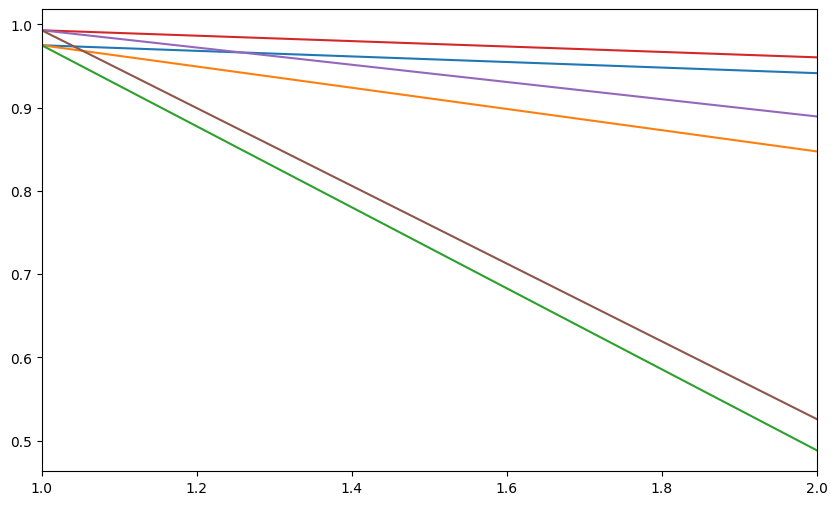

<Figure size 640x480 with 0 Axes>

In [18]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)

plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg['succeeded'],
    std=std['succeeded'],
    max_robots=max_robots,
    algs=algs,
    ylabel="Goal Success Rate",
)
fig.savefig('intersections_goal_success_rates.png', bbox_inches='tight')

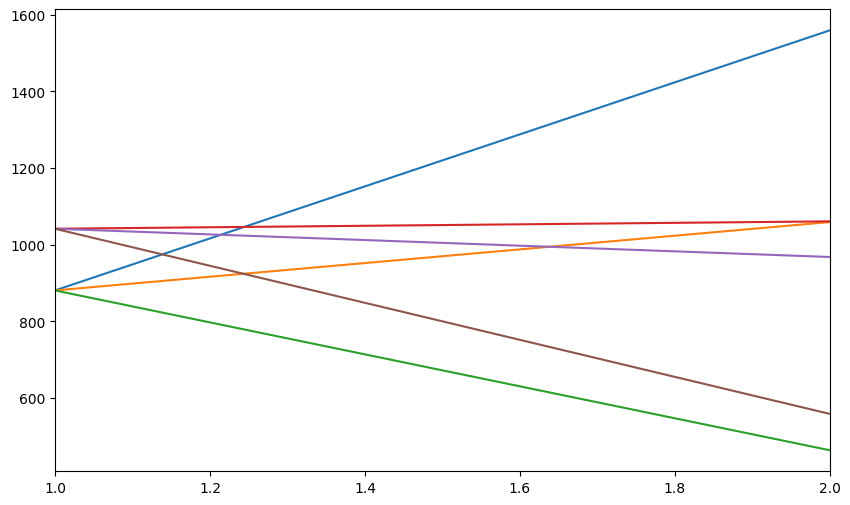

<Figure size 640x480 with 0 Axes>

In [19]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)

plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg['distance_traveled'],
    std=std['distance_traveled'],
    max_robots=max_robots,
    algs=algs,
    ylabel="Distance",
)
fig.savefig('intersections_avg_distance_traveled.png', bbox_inches='tight')

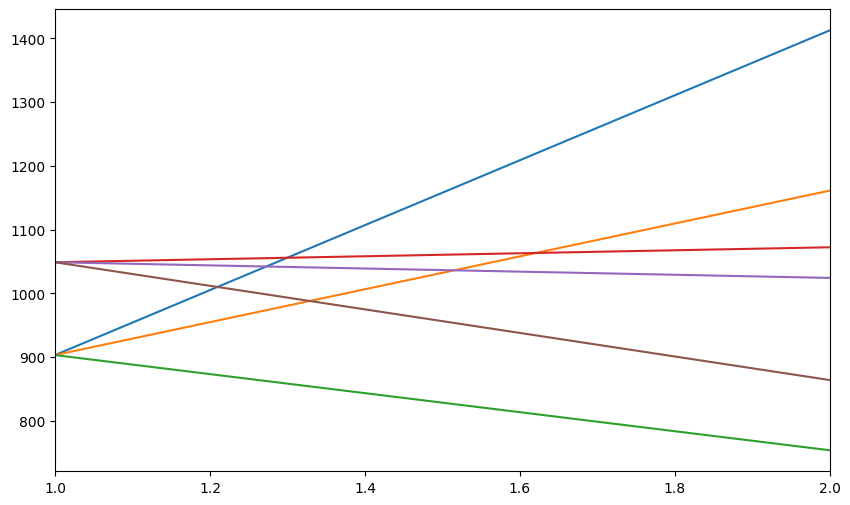

<Figure size 640x480 with 0 Axes>

In [20]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)

plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=dist_per_success_avg,
    std=dist_per_success_std,
    max_robots=max_robots,
    algs=algs,
    ylabel="Distance Per Successful Goal",
)
fig.savefig('intersections_avg_distance_traveled_per_success.png', bbox_inches='tight')

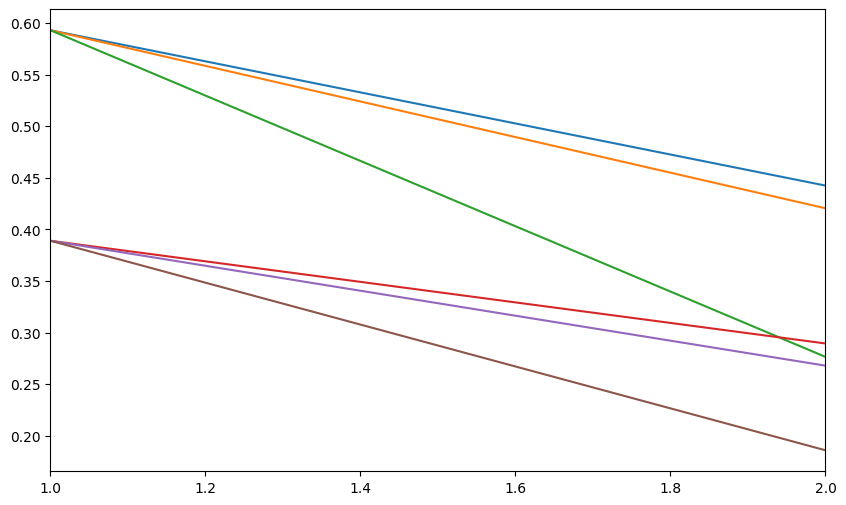

<Figure size 640x480 with 0 Axes>

In [21]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)
plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg['n_transfers'],
    std=std['n_transfers'],
    max_robots=max_robots,
    algs=algs,
    ylabel="Num Transfers",
)
fig.savefig('intersections_num_transfers.png', bbox_inches='tight')

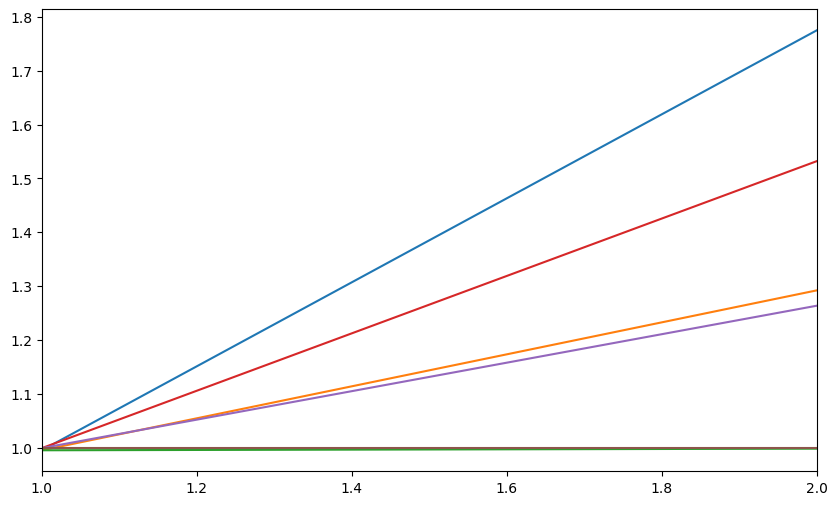

<Figure size 640x480 with 0 Axes>

In [22]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)
plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg['replans'],
    std=std['replans'],
    max_robots=max_robots,
    algs=algs,
    ylabel="Num Replans",
)
fig.savefig('intersections_num_replans.png', bbox_inches='tight')

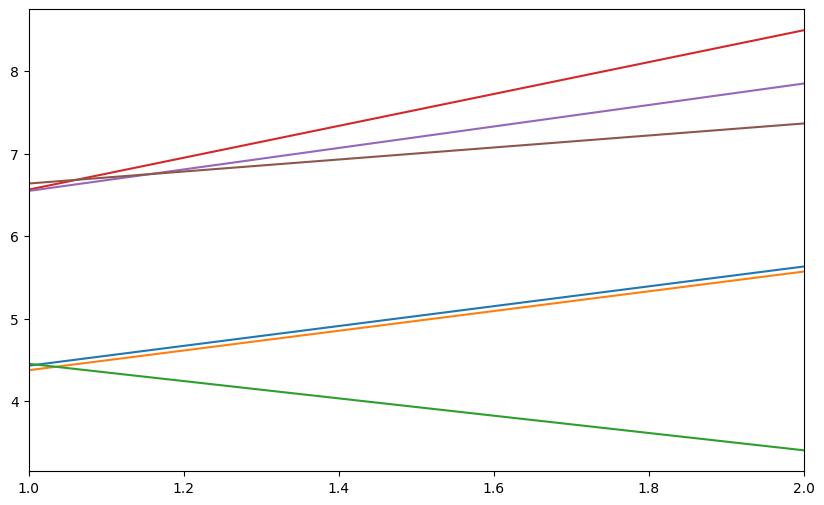

<Figure size 640x480 with 0 Axes>

In [23]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)
plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg['planning_time'],
    std=std['planning_time'],
    max_robots=max_robots,
    algs=algs,
    ylabel="Planning Time",
)
fig.savefig('intersections_planning_time.png', bbox_inches='tight')

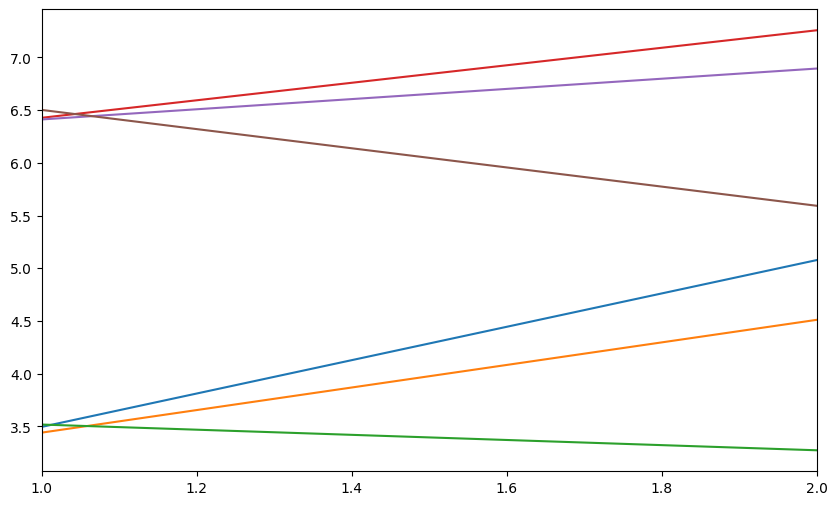

<Figure size 640x480 with 0 Axes>

In [24]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)
plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg_success['planning_time'],
    std=avg_success['planning_time'],
    max_robots=max_robots,
    algs=algs,
    ylabel="Planning Time",
)
fig.savefig('intersections_goal_planning_time_per_success.png', bbox_inches='tight')

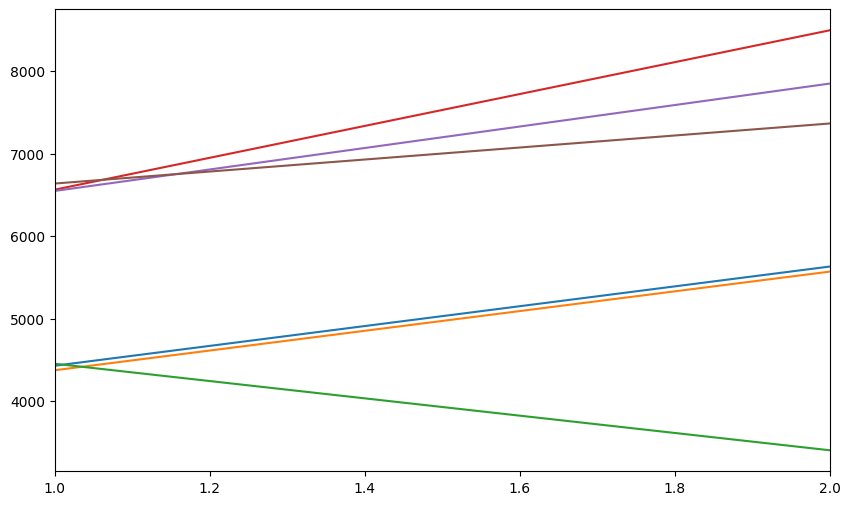

<Figure size 640x480 with 0 Axes>

In [25]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)
plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg_per_sim['planning_time'],
    std=std_per_sim['planning_time'],
    max_robots=max_robots,
    algs=algs,
    ylabel="Planning Time",
)
fig.savefig('intersections_sim_planning_time.png', bbox_inches='tight')

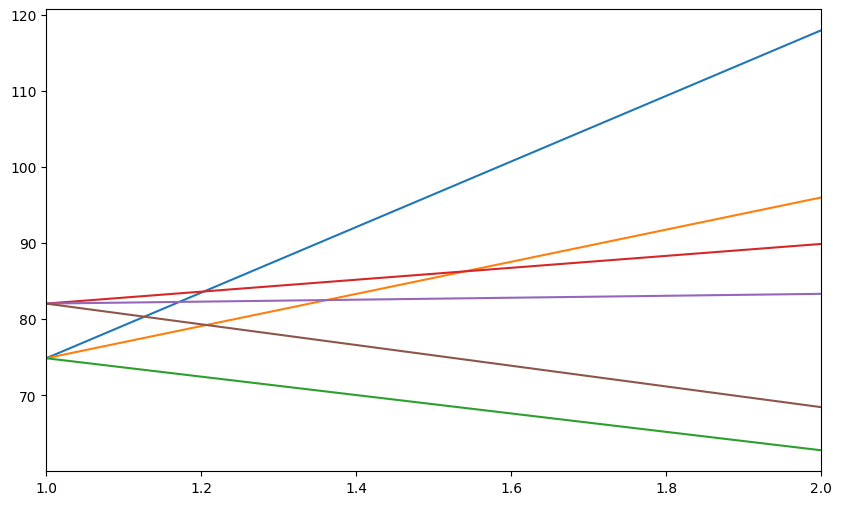

<Figure size 640x480 with 0 Axes>

In [26]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)
plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg_success['n_steps'],
    std=std_success['n_steps'],
    max_robots=max_robots,
    algs=algs,
    ylabel="Steps",
)
fig.savefig('intersections_steps.png', bbox_inches='tight')

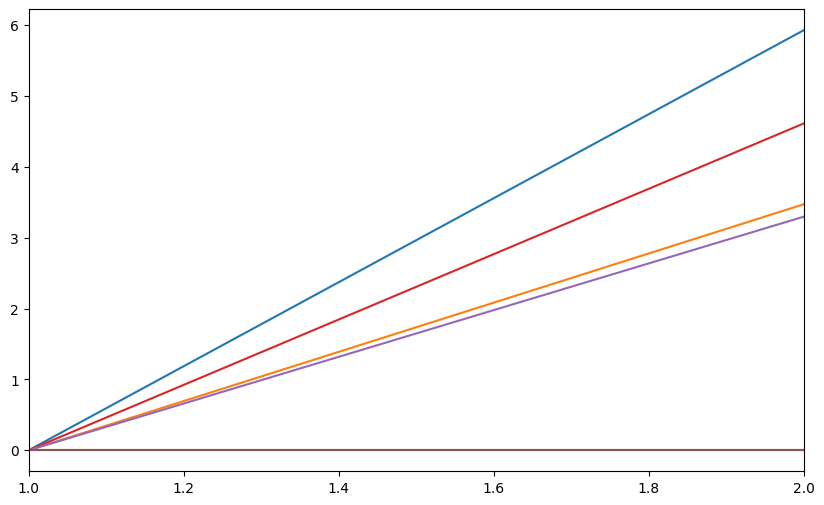

<Figure size 640x480 with 0 Axes>

In [27]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)
plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg_success['postponements'],
    std=std_success['postponements'],
    max_robots=max_robots,
    algs=algs,
    ylabel="Postponments",
)
fig.savefig('intersections_postpones.png', bbox_inches='tight')